# Project for Applied Statistics
___

The aim of this project is to analyze the PlantGrowth R dataset.

The dataset is described by Vincent Arel-Bundock as "Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions."

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('data/PlantGrowth.csv')

data.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [3]:
data

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


As can be seen above and mentioned on https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html there are 30 entries in the dataset. 10 each for a control group, treatment 1, and treatment 2.

<Axes: xlabel='group', ylabel='weight'>

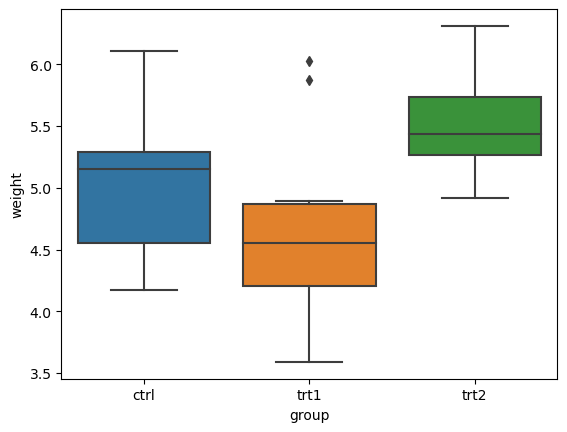

In [4]:
# Create a boxplot
# https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn-boxplot
sns.boxplot(x='group', y='weight', data=data)

The box plot above shows some interesting distinctions between the three categories within the dataset.
The categories trt1 and trt2 have the largest difference between them, with no overlap in their interquartile range (https://www.statology.org/box-plot-percentages/) or whiskers (https://seaborn.pydata.org/tutorial/categorical.html#boxplots).

<Axes: xlabel='group', ylabel='weight'>

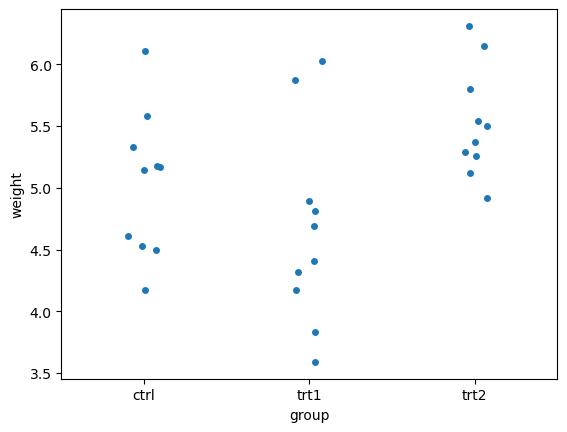

In [5]:
# Create a stripplot
# https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn-stripplot
sns.stripplot(x='group', y='weight', data=data, jitter=True, edgecolor='gray')  

## t-tests
___
t-tests are a form of hypothesis testing. Hypothesis testing compares the null hypothesis with an alternative hypothesis.

- The null hypothesis will be that there is no effect, or no difference between the two groups considered.
- The alternative hypothesis is the hypothesis that is being tested for.

With the above data one might test to see if there is a difference in weight between any two of the groups recorded. Some information on hypothesis testing can be found [here](https://towardsdatascience.com/t-test-and-hypothesis-testing-explained-simply-1cff6358633e).

There are [three types](https://www.geeksforgeeks.org/t-test-in-statistics/) of t-test:
1. One Sample t-test - Test to be carried out when only one data set is available/required. Gets the mean of a group and checks the likelihood this average was gotten by chance or is representative.
2. Independent Samples t-test - Compares the means of two independent data sets and allows inference about the likelihood of those representing different population means.
3. Paired Samples t-test - Compares the means of two related data sets and allows inference about the likelihood of those representing different population means.

Each of the above types has a different formula that is used to calculate the t-statistic (the output of the t-test). While the formula will be different for each type of t-test, the underlying principle is to check the likelihood that the group mean (or difference in group means for types 2 and 3 above) is representative of the population.

[This](https://towardsdatascience.com/t-test-and-hypothesis-testing-explained-simply-1cff6358633e) resource likens the t-test to a signal-to-noise ratio. The below image from their website highlights this.

![](img/sig_noise.PNG)

The signal in this case being the difference in the group means, and the noise being the variance or spread of the samples. From this we can see that a larger difference in the means of the groups compared will result in a larger output (t-statistic). Conversely, a larger spread of values (resulting in a alrger value for sp) and/or a small number of samples (resulting in a larger value for the square root of 2/n) will reduce the size of the t-statistic.

### Assumptions
The t-test operates correctly only when certain assumptions about the data being analysed are met. The assumptions will vary depending on the type of t-test being utilized. Info on these assumptions for [one-sample](https://statistics.laerd.com/spss-tutorials/one-sample-t-test-using-spss-statistics.php), [independent](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php), and [dependent](https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php) t-tests can be found on the Laerd SPSS website. Below we will look at the assumptions for the dependent t-test as that is the most relevant to the current project. The assumptions are:

1. The dependent variable should be measured on a continuous scale. The variable should be measured using floating point or 'measuring' numbers rather than integers or categories.
2. The independent variable should have two categorical 'matched pairs'. This will often take the form of a 'before' and 'after' where there will be measurements for the same participant in a study before and after an intervention of some kind.
3. There should be no significant outliers bewteen the two groups being analysed. Outliers can diminish the validity of the reult from a dependent t-test.
4. The distribution of the differences in the dependent variable between the two groups should be approximately normally distributed. The Shapiro-Wilk test of normality can be used to test this.

In [7]:
# create dataframe with treatment 1
trt1 = data[data.group == 'trt1']
trt1

,rownames,weight,group
10,11,4.81,trt1
11,12,4.17,trt1
12,13,4.41,trt1
13,14,3.59,trt1
14,15,5.87,trt1
15,16,3.83,trt1
16,17,6.03,trt1
17,18,4.89,trt1
18,19,4.32,trt1
19,20,4.69,trt1


In [8]:
# create dataframe with treatment 2
trt2 = data[data.group == 'trt2']
trt2

,rownames,weight,group
20,21,6.31,trt2
21,22,5.12,trt2
22,23,5.54,trt2
23,24,5.50,trt2
24,25,5.37,trt2
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


In [9]:
# Perform a dependent t-test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
t_statistic, p_value = stats.ttest_rel(trt1['weight'], trt2['weight'])
print(t_statistic, p_value)


-2.8463513880802855 0.0192031388472628


From the above output we can see that the p-value is less than 0.05 and so we can reject the null hypothesis and infer that there is significant difference between groups trt1 and trt2.

In [10]:
# create dataframe with control group
ctrl = data[data.group == 'ctrl']
ctrl

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [11]:
# Perform a one-way ANOVA
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
f_statistic, p_value = stats.f_oneway(trt1['weight'], trt2['weight'], ctrl['weight'])
print(f_statistic, p_value)

4.846087862380135 0.01590995832562293


From this output we can see that the ANOVA also shows that there is significant difference between at least 2 of the groups. The ANOVA does not give us any information about which groups are significantly different.